# Objective:


In [41]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import random
  
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')


dataset.head()


,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [42]:
#remove NAN
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [43]:
dataset = dataset[[
    'ICU_mortality',
 'LOS_Group',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]
dataset.shape

(976, 64)

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['active problems'] = le.fit_transform(dataset['active problems'].astype(str))
dataset['background problems'] = le.fit_transform(dataset['background problems'].astype(str))
dataset['gender'] = le.fit_transform(dataset['gender'].astype(str))
dataset['feeding'] = le.fit_transform(dataset['feeding'].astype(str))
dataset['LOS_Group'] = le.fit_transform(dataset['feeding'].astype(str))

In [45]:
x = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

## 4. Feature Scaling:
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

### Standardization
In machine learning, we can handle various types of data, e.g. audio signals and pixel values for image data, and this data can include multiple dimensions. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and neural networks. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

## Standard Scaler

##  $$x'= \frac{x - mean(x)}{\sigma}$$


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
x_train_scaler = scaler.transform(x)

In [48]:
from sklearn import model_selection
seed = 1
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Nearest Neighbors",
         "Decision Tree",
         "Random Forest", 
         #"AdaBoost",
         # "SVM Linear",
        "Logistic Regression"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
   # AdaBoostClassifier(),
   # SVC(kernel = 'linear'), 
    LogisticRegression(n_jobs = -1)

]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_train_scaler[0:8000 ], y[0:8000 ], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Nearest Neighbors: 0.737745 (0.035282)
Decision Tree: 0.646402 (0.032372)
Random Forest: 0.762297 (0.022708)


KeyboardInterrupt: 

## 5. Dimentionality Reduction
Having too many features in the training set can make the training process extremely slow and makes it unlikely to get a good solution.
In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

## Principal component analysis (PCA)
The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized.

### Ploting the relation between the Variance and the Dimensions

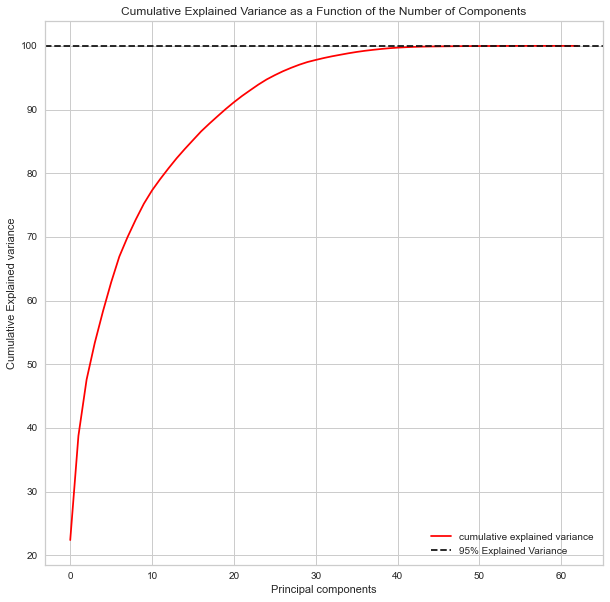

In [49]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_scaler)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 100, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

This curve quantifies how much of the total, 785-dimensional variance is contained within the first N components. 
For example, we see that  the first 100 components contain approximately 90% of the variance, 
while you need around 600 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance)
and that we'd need about 100 components to retain 90% of the variance.
Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present 
in multiple observations.

In [50]:
from sklearn.decomposition import PCA

pca = PCA(0.99) 
pca.fit(x_train_scaler)

x_train_pca = pca.transform(x_train_scaler)



In [51]:
train=pd.concat([pd.DataFrame(x_train_pca),y],axis=1)


In [52]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,ICU_mortality
0,6.507584,1.229608,3.190237,-0.553391,0.871079,0.377609,-1.049099,2.084738,1.899243,-0.574213,...,-0.845964,0.773519,-1.120860,0.043963,0.230275,-0.102461,-0.041962,-0.175758,0.551919,0.0
1,-0.347942,-2.695771,-0.129913,1.249309,1.788557,-0.862104,0.309911,0.121996,-1.586013,0.131058,...,0.248214,-0.459567,-0.300702,-0.243381,0.058490,-0.147197,0.024261,-0.163698,0.029046,0.0
2,-2.907528,4.745350,1.166188,3.038184,-1.997738,-1.735980,6.372877,-2.608954,0.689010,-5.165118,...,2.267662,0.426360,2.926183,1.894823,-0.763221,-1.270546,0.144780,-0.276251,-1.266056,0.0
3,3.619596,-1.151234,5.326175,0.745470,-1.465736,-0.149709,0.744327,1.314350,-0.716199,0.039095,...,0.547735,0.162137,-0.480854,-0.256480,0.533779,0.416965,-0.030752,-0.266978,-0.427899,0.0
4,2.576689,-0.486206,0.684148,-2.055802,1.925728,1.631631,2.501827,-0.479897,-0.479069,0.879594,...,0.242292,-0.040348,0.922604,0.070997,-0.774652,-0.254404,-0.112824,0.018020,0.716921,0.0


In [53]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
train=clean_dataset(train)

In [54]:
train.shape

(932, 37)

In [55]:
from pycaret.classification import *
model_setup = setup(data=train, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,7786
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(932, 37)"
5,Missing Values,False
6,Numeric Features,36
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7732,0.0000,0.1013,0.5500,0.1681,0.1052,0.1564,0.0130
rf,Random Forest Classifier,0.7732,0.5589,0.0551,0.5000,0.0981,0.0629,0.1126,0.0920
lda,Linear Discriminant Analysis,0.7679,0.5562,0.1321,0.5536,0.2040,0.1209,0.1690,0.0060
lr,Logistic Regression,0.7643,0.5336,0.1167,0.5322,0.1818,0.1024,0.1491,0.0220
et,Extra Trees Classifier,0.7643,0.5837,0.0154,0.1500,0.0276,0.0052,0.0071,0.0740
ada,Ada Boost Classifier,0.7607,0.6135,0.1955,0.4320,0.2620,0.1510,0.1666,0.0470
knn,K Neighbors Classifier,0.7518,0.5188,0.1160,0.4083,0.1732,0.0759,0.1017,0.0100
lightgbm,Light Gradient Boosting Machine,0.7464,0.6047,0.0936,0.3683,0.1434,0.0480,0.0681,0.0400
nb,Naive Bayes,0.7375,0.5173,0.1481,0.4027,0.2052,0.0807,0.1043,0.0070
gbc,Gradient Boosting Classifier,0.7357,0.5488,0.0782,0.2836,0.1166,0.0183,0.0319,0.1300


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=5784,
                solver='auto', tol=0.001)


In [56]:
model = create_model("qda")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4091,0.5275,0.6250,0.2326,0.3390,-0.0222,-0.0315
1,0.3636,0.4531,0.7500,0.2400,0.3636,-0.0058,-0.0100
2,0.2923,0.3973,0.8000,0.2182,0.3429,-0.0310,-0.0701
3,0.3692,0.5982,0.9375,0.2727,0.4225,0.0665,0.1447
4,0.3231,0.4872,0.8125,0.2407,0.3714,-0.0135,-0.0278
5,0.4154,0.6046,0.8750,0.2800,0.4242,0.0818,0.1435
6,0.3538,0.4668,0.7500,0.2400,0.3636,-0.0149,-0.0261
7,0.3231,0.5714,0.6875,0.2200,0.3333,-0.0632,-0.1108
8,0.3385,0.4974,0.8125,0.2453,0.3768,-0.0022,-0.0042
9,0.2923,0.3661,0.6875,0.2115,0.3235,-0.0849,-0.1607


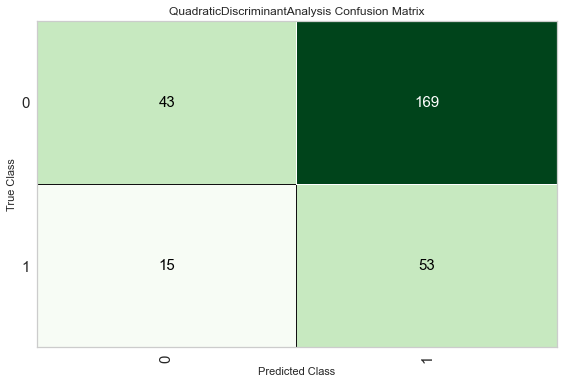

In [57]:
plot_model(tuned_rf, plot = 'confusion_matrix')